<a href="https://colab.research.google.com/github/BecaMachado/DIO_DesafioCodigo_PythonPandas/blob/main/Visualiza%C3%A7%C3%A3o_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importando a biblioteca
import pandas as pd

In [2]:
#lendo os arquivos
df1 = pd.read_excel("/content/drive/MyDrive/datasets/Aracaju.xlsx")
df2 = pd.read_excel("/content/drive/MyDrive/datasets/Fortaleza.xlsx")
df3 = pd.read_excel("/content/drive/MyDrive/datasets/Natal.xlsx")
df4 = pd.read_excel("/content/drive/MyDrive/datasets/Recife.xlsx")
df5 = pd.read_excel("/content/drive/MyDrive/datasets/Salvador.xlsx")

In [3]:
df = pd.concat([df1,df2,df3,df4,df5])

In [6]:
#verificando a quantidade de linhas por LojaID.
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

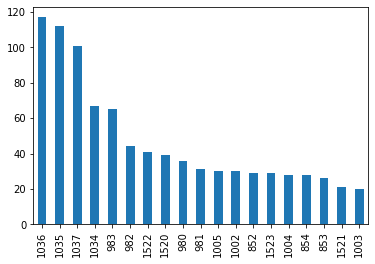

In [7]:
#grafico de barras vertical
df["LojaID"].value_counts(ascending=False).plot.bar()

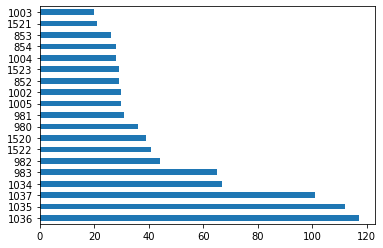

In [10]:
#grafico de barras horizontal
df["LojaID"].value_counts().plot.barh()

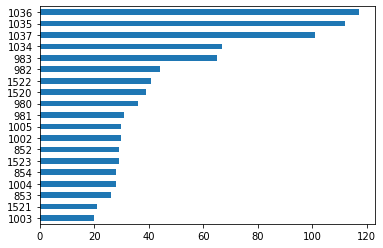

In [11]:
#grafico de barras horizontal ordenado
df["LojaID"].value_counts(ascending=True).plot.barh();

In [13]:
#criando a coluna da receita
df["Receita"]= df["Vendas"].mul(df["Qtde"])

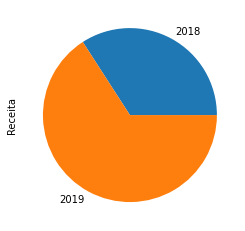

In [14]:
#grafico de pizza
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie()

In [15]:
#total devendas por cidade
df["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

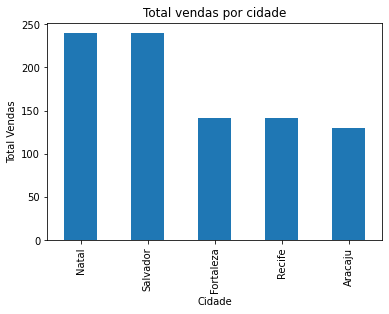

In [23]:
#adicionando um titulo e alterando o nome dos eixos
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total vendas por cidade");
plt.xlabel("Cidade");
plt.ylabel("Total Vendas");

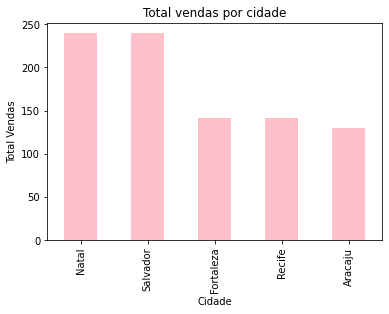

In [25]:
#alterando a cor
df["Cidade"].value_counts().plot.bar(title="Total vendas por cidade", color ="pink");
plt.xlabel("Cidade");
plt.ylabel("Total Vendas");

In [27]:
df.columns

Index(['Cidade', 'Data', 'Vendas', 'LojaID', 'Qtde', 'Receita'], dtype='object')

In [29]:
#criando colunas do exercicio anterior para visualização gráfica
df["mês_venda"], df["dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)
df.columns

Index(['Cidade', 'Data', 'Vendas', 'LojaID', 'Qtde', 'Receita', 'mês_venda',
       'dia_venda'],
      dtype='object')

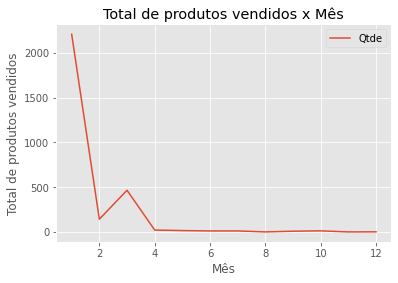

In [37]:
#alterando o estilo
plt.style.use("ggplot")
df.groupby(df["mês_venda"])["Qtde"].sum().plot(title = "Total de produtos vendidos x Mês");
plt.xlabel("Mês")
plt.ylabel("Total de produtos vendidos")
plt.legend();

In [38]:
#verificando a quantidade de produtos vendidos no mês
df.groupby(df["mês_venda"])[ "Qtde"].sum()

mês_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [42]:
#criando nova coluna com ano
df["Ano_Venda"] = df["Data"].dt.year
df.columns

Index(['Cidade', 'Data', 'Vendas', 'LojaID', 'Qtde', 'Receita', 'mês_venda',
       'dia_venda', 'Ano_Venda'],
      dtype='object')

In [43]:
#selecionando apenas as vendas de 2019
df_2019 = df[df["Ano_Venda"] == 2019]

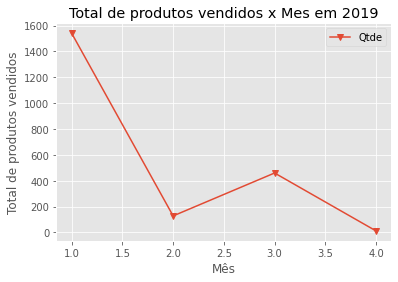

In [47]:
#total de produtos vendidos por mês em 2019 e utilizando marcador "v"
df_2019.groupby(df_2019["mês_venda"])["Qtde"].sum().plot(title = "Total de produtos vendidos x Mes em 2019", marker = "v");
plt.xlabel("Mês")
plt.ylabel("Total de produtos vendidos")
plt.legend();

Text(0, 0.5, 'Total de produtos vendidos')

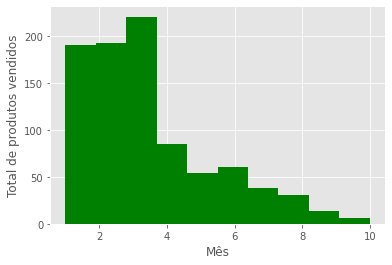

In [52]:
#hisograma
plt.hist(df["Qtde"], color="green");
plt.xlabel("Mês")
plt.ylabel("Total de produtos vendidos")

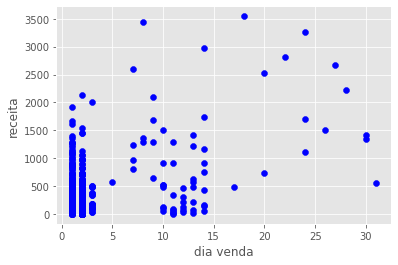

In [57]:
#gráfico de dispersão
plt.scatter(x=df_2019["dia_venda"], y= df_2019["Receita"], color = "blue");
plt.xlabel("dia venda")
plt.ylabel ("receita");

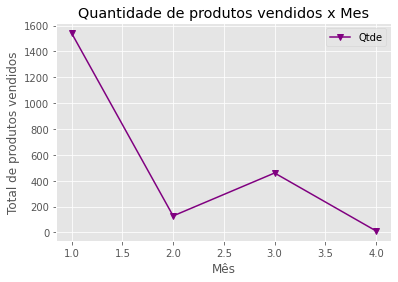

In [56]:
#salvando em .png
df_2019.groupby(df_2019["mês_venda"])["Qtde"].sum().plot(marker = "v", color = "purple");
plt.title("Quantidade de produtos vendidos x Mes")
plt.xlabel("Mês")
plt.ylabel("Total de produtos vendidos")
plt.legend();
plt.savefig("grafico QTDE x MES.png")